AISSI MED SALIM M2 IV 171731077785 ,https://github.com/sal1717lim/TAI

# TP à rendre 2 Egalisation d'histogrammes
Dans ce TP, nous aimerions améliorer le contraste d'images par deux méthodes. Une méthode d'expansion de la dynamique, et une méthode d'égalisaton d'histogramme. La première image à traiter est dans un fichier npy à loader. Le reste des images sont dans le même dossier. 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# Lire et afficher l'image à utiliser

In [2]:
image = np.genfromtxt('image.csv', delimiter=';')


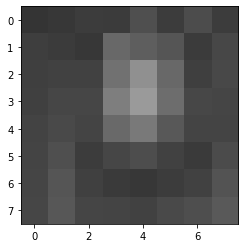

In [3]:
plt.imshow(image,cmap='gray',vmin=0,vmax=255)

### l'affichage de l'image se fait avec la fonction plt.imshow ,les parametres vmin et vmax doivent etre pecifier car la couleur est codée sur 8bits(1 octet) , sans c'est 2 parametres , la fonction attribura le blanc a l'intensité max et noir a l'intensité min

# Calculer les métriques sur l'image
1.	Calculer la moyenne de luminance de l’image.
2.	Donner la dynamique de l’image (intervalle [Lmin, Lmax]).
3.	Calculer le contraste de l’image.
4.	Calculer l’écart type des niveaux de gris de l’image.


In [4]:
moy = int(np.mean(image))
print('1-la moyenne de luminance de l’image est: ',moy)
#*****************************
VMAX=np.amax(image)
VMIN=np.amin(image)
dynamique = int(VMAX - VMIN)
print("2-dynamique de l’image  est: ",dynamique,"\nintervalle [Lmin, Lmax]=[",VMIN,",",VMAX,"]")
#*****************************
contraste = ((VMAX-VMIN)/(VMAX+VMIN))
print("3-le contraste de l’image est :",contraste)
#*****************************
moins_moy = pow((image - moy), 2)
somme = sum(sum(moins_moy))
variance = somme/(image.shape[0]*image.shape[1])
Ecart_type = np.sqrt(variance)
print("4-l’écart type des niveaux de gris de l’image est:",Ecart_type)

1-la moyenne de luminance de l’image est:  76
2-dynamique de l’image  est:  102 
intervalle [Lmin, Lmax]=[ 52.0 , 154.0 ]
3-le contraste de l’image est : 0.49514563106796117
4-l’écart type des niveaux de gris de l’image est: 20.916874168957463


# Histogramme et histogramme cumulé
5.	Construire l’histogramme de cette image ainsi que son histogramme normalisé.
6.	Construire l’histogramme cumulé de cette image ainsi que son histogramme cumulé normalisé.


Histogramme


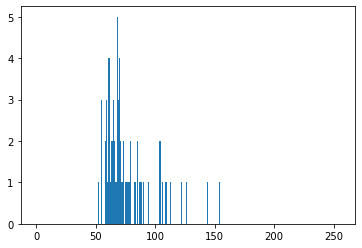

Histogramme Normalisé


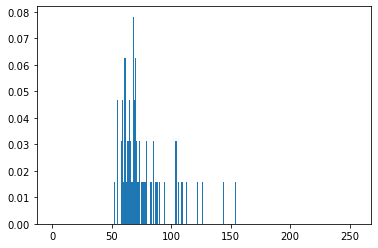

histogramme_cum


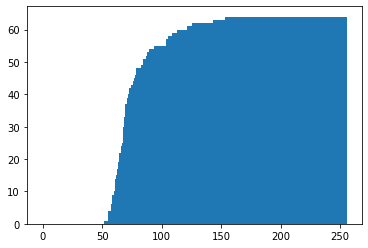

histogramme cumule normalisé


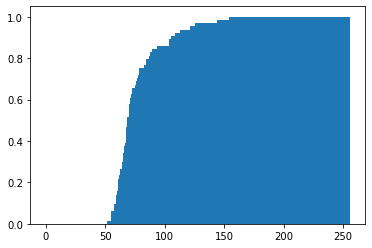

In [5]:
#histogramme
def creerhist(image):
    histogramme = {}
    for i in range(256):
        histogramme[i] = 0

    for ligne in image:
        for colonne in ligne:
            histogramme[colonne] += 1
    return histogramme

histogramme=creerhist(image)
def afficherhist(histogramme,titre):
    print(titre)
    x, y = zip(*histogramme.items())
    plt.bar(x, y,width=1)
    plt.show()
afficherhist(histogramme,'Histogramme')
#histogramme normalise
def creerhist_Normalise(image):
    histogramme=creerhist(image)
    histogramme_normalise = {}
    for i in range(256):
        histogramme_normalise[i] = histogramme[i]/(image.shape[0]*image.shape[1])
    return histogramme_normalise
histogramme_normalise=creerhist_Normalise(image)
afficherhist(histogramme_normalise,"Histogramme Normalisé")

#histogramme cumulé
def creerhistogramme_cumulé(image):
    histogramme=creerhist(image)
    histogramme_cum = {}
    histogramme_cum[0] = histogramme[0]
    for i in range(1,256):
        histogramme_cum[i] = histogramme[i]+histogramme_cum[i-1]
    return histogramme_cum
histogramme_cum=creerhistogramme_cumulé(image)
afficherhist(histogramme_cum,"histogramme_cum")

#histogramme normalisé cumulé
def creerhistogramme_cumN(image):
    histogramme_normalise=creerhist_Normalise(image)
    histogramme_cumN = {}
    histogramme_cumN[0] = histogramme_normalise[0]
    for i in range(1,256):
        histogramme_cumN[i] = histogramme_normalise[i]+histogramme_cumN[i-1]
    return histogramme_cumN
histogramme_cumN=creerhistogramme_cumN(image)
afficherhist(histogramme_cumN,"histogramme cumule normalisé")


# Comparer votre implémentation aux fonctions de opencv

In [6]:
cv2.imwrite("image.png",image,[0])
cv2.imwrite("image.jpg",image,[0])

True

## Remarque sur les differences:
### -dans un premier temp ,la methode cv.calculhist n'accepte pas de tableau numpy en parametre , pour palier a ca ,j'ai enregistré l'image avec cv.imwrite puis ,j'ai elu l'image pour que soie accepter par cv2.calculhist 
### j'ai fait la sauvegarde de l'image sous le format jpg et png pour voir la difference

format png


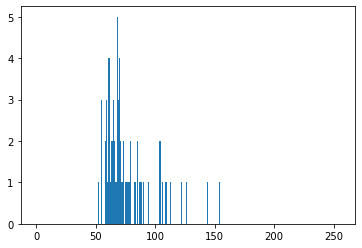

format jpg


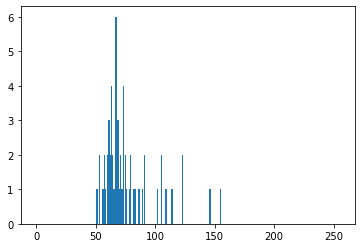

Histogramme initiale


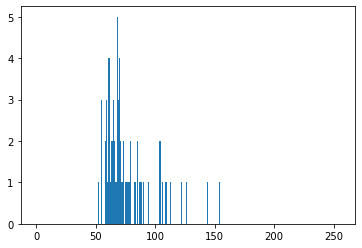

In [7]:
imagepng=cv2.imread("image.png",0)
imagejpg=cv2.imread("image.jpg",0)
histg = cv2.calcHist([imagepng],[0],None,[256],[0,255]) 
plt.bar([x for x in range(256)],[x[-1] for x in histg],width=1)
print("format png")
plt.show()
print("format jpg")
histg = cv2.calcHist([imagejpg],[0],None,[256],[0,255]) 
plt.bar([x for x in range(256)],[x[-1] for x in histg],width=1)
plt.show()
afficherhist(histogramme,'Histogramme initiale')

## comparaison des 3 histogrammes:
#### - apres calcule des histogrammes des images jpg et png , nous remarquons une differences notable entre l'histogramme jpg et l'histogramme initiale, (nombre de repetition max =5 pour l'histogramme initiale , et max=6 pour l'histogramme jpg) mais aucune differences avec l'histogramme png
#### - supposition: cette differences est surment du a la compression jpg qui a fait une tres grande perte d'information

# 7.	Egalisation d'histogramme.

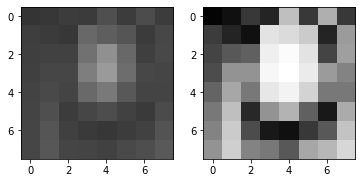

In [8]:
def egalisation(image,H):
    e=np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            e[i][j]=round(H[image[i][j]]*255)
    return e
e=egalisation(image,histogramme_cumN)
plt.subplot(121)
plt.imshow(image,cmap='gray',vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(e,cmap='gray',vmin=0, vmax=255)

        

Histogramme avant egalisation:


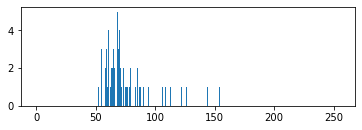

Histogramme apres agalisation:


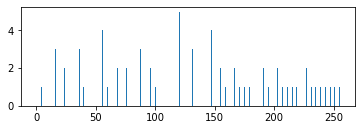

In [9]:
histogramme3={}
for i in range(256):
    histogramme3[i] = 0
for ligne in e:
    for colonne in ligne:
        histogramme3[colonne] += 1
print("Histogramme avant egalisation:")
plt.subplot(211)
x, y = zip(*histogramme.items())
plt.bar(x, y)
plt.show()
print("Histogramme apres agalisation:")
plt.subplot(212)
x, y = zip(*histogramme3.items())
plt.bar(x, y)
plt.show()

# Expansion de la dynamique et comparaison avec l'égalisation d'histogramme

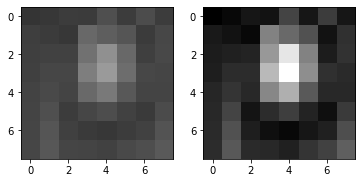

In [10]:
def etendre(image,vmax,vmin):
    resultat=np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            resultat[i][j]=round((255*(image[i][j]-vmin))/(vmax-vmin))
    return resultat
r=etendre(image,np.amax(image),np.amin(image))
histogramme2 = {}
for i in range(256):
    histogramme2[i] = 0
plt.subplot(121)
plt.imshow(image,cmap='gray',vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(r,cmap='gray',vmin=0, vmax=255)
for ligne in r:
    for colonne in ligne:
        histogramme2[colonne] += 1

            
    

Histogramme avant Expansion de la dynamique:


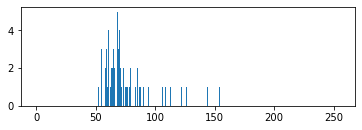

Histogramme apres Expansion de la dynamique:


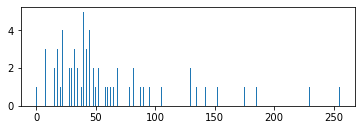

In [11]:
print("Histogramme avant Expansion de la dynamique:")
plt.subplot(211)
x, y = zip(*histogramme.items())
plt.bar(x, y)
plt.show()
print("Histogramme apres Expansion de la dynamique:")
plt.subplot(212)
x, y = zip(*histogramme2.items())
plt.bar(x, y)
plt.show()

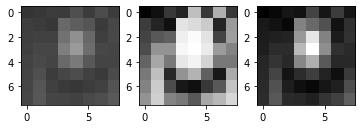

In [12]:
plt.subplot(131)
plt.imshow(image,cmap='gray',vmin=0, vmax=255)
plt.subplot(132)
plt.imshow(e,cmap='gray',vmin=0, vmax=255)
plt.subplot(133)
plt.imshow(r,cmap='gray',vmin=0, vmax=255)

# Améliorer le contraste des images données
améliorer le contraste des 3 images envoyées avec les méthodes implémentées precedemment.

## einstein

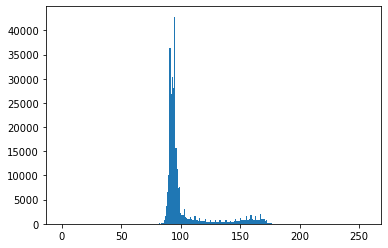

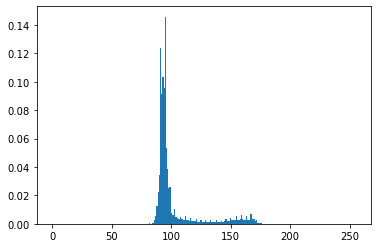

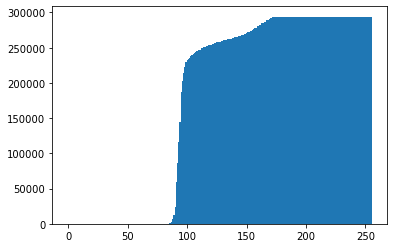

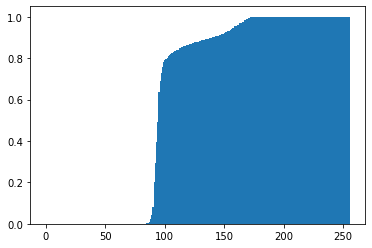

In [13]:
einstein=cv2.imread("Fig0228(a).tif",0)
Hist_einstein=creerhist(einstein)
afficherhist(Hist_einstein,"")
HistN_einstein=creerhist_Normalise(einstein)
afficherhist(HistN_einstein,"")
HistCum_einstein=creerhistogramme_cumulé(einstein)
afficherhist(HistCum_einstein,"")
HistCumN_einstein=creerhistogramme_cumN(einstein)
afficherhist(HistCumN_einstein,"")

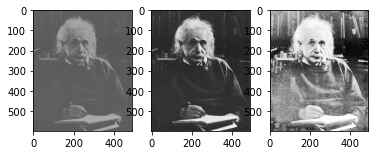

In [14]:
plt.subplot(131)
plt.imshow(einstein,cmap='gray',vmin=0, vmax=255)
plt.subplot(132)
R1=etendre(einstein,np.amax(einstein),np.amin(einstein))
plt.imshow(R1,cmap='gray',vmin=0, vmax=255)
plt.subplot(133)
R2=egalisation(einstein,HistCumN_einstein)
plt.imshow(R2,cmap='gray',vmin=0, vmax=255)

## café

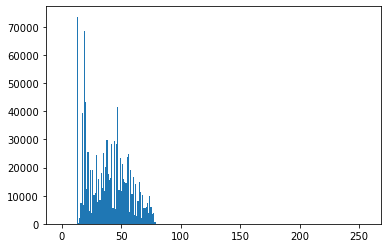

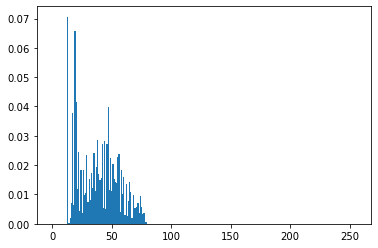

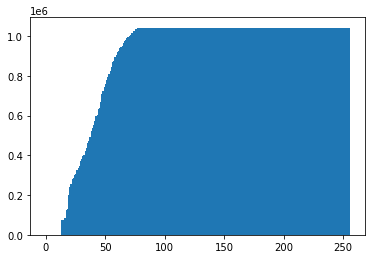

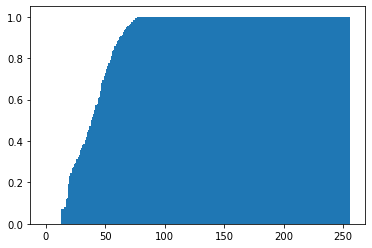

In [15]:
cafe=cv2.imread("Fig0208(a).tif",0)
Hist_cafe=creerhist(cafe)
afficherhist(Hist_cafe,"")
HistN_cafe=creerhist_Normalise(cafe)
afficherhist(HistN_cafe,"")
HistCum_cafe=creerhistogramme_cumulé(cafe)
afficherhist(HistCum_cafe,"")
HistCumN_cafe=creerhistogramme_cumN(cafe)
afficherhist(HistCumN_cafe,"")

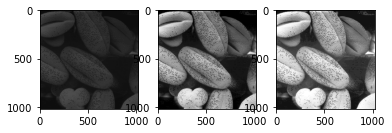

In [16]:
plt.subplot(131)
plt.imshow(cafe,cmap='gray',vmin=0, vmax=255)
plt.subplot(132)
R1=etendre(cafe,np.amax(cafe),np.amin(cafe))
plt.imshow(R1,cmap='gray',vmin=0, vmax=255)
plt.subplot(133)
R2=egalisation(cafe,HistCumN_cafe)
plt.imshow(R2,cmap='gray',vmin=0, vmax=255)

# Consignes
Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi à 19h


In [17]:
# bonne chance